## **Name:** First Last

## **Computing ID:** ID

# Lab 1: Pandas and Data Sourcing (50 Points)
Version 2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iwoJjEGsY2ej0s9i0iPXw50qpjNoDf_p?usp=sharing)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import requests
import json

## Part 1: Data Structure Review and Pandas Functions (20 Points)

## **Question 1 (10 points):** Read in or load a dataset as a Pandas DataFrame with at least 3 features and no more than 5. You may need to drop or filter columns in larger DataFrames. Make a single summary visual that encodes *all* the features (ie: columns) in your DataFrame. You may load your own dataset in (ie: from Kaggle), or pick from the datasets available in PyDataset already loaded below for your convenience.

For example, you could summarize a dataset with 3 features with a simple scatter plot and colors for different values in a column. You could also plot each column individually. Features like different line or point labels, plot types, color, marker shapes, and even subplots might be necessary!

In [2]:
dataset_list = data()
dataset_list

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [18]:
dataset_list.loc[100:110]

,dataset_id,title
100,hirose,Failure Time of PET Film
101,islay,Jura Quartzite Azimuths on Islay
102,manaus,Average Heights of the Rio Negro river at Manaus
103,melanoma,Survival from Malignant Melanoma
104,motor,Data from a Simulated Motorcycle Accident
105,neuro,Neurophysiological Point Process Data
106,nitrofen,Toxicity of Nitrofen in Aquatic Systems
107,nodal,Nodal Involvement in Prostate Cancer
108,nuclear,Nuclear Power Station Construction Data
109,paulsen,Neurotransmission in Guinea Pig Brains


In [20]:
# Select motor dataset
motor_df = data('motor')
motor_df.head()

,times,accel,strata,v
1,2.4,0.0,1,3.7
2,2.6,-1.3,1,3.7
3,3.2,-2.7,1,3.7
4,3.6,0.0,1,3.7
5,4.0,-2.7,1,3.7


In [62]:
# motor_df.drop(['times'], axis=1).head() - drop colummn by name
# motor_df.drop(motor_df.columns[1], axis=1).head() - drop column by index
# motor_df[['times', 'accel']].head() - keep column by name
# motor_df.loc[:, ['times', 'accel']].head() - keep column by name
# motor_df.filter(['times'], axis=1).head() - keep column by name
# motor_df.iloc[:, [0,2]].head() - keep column by index
motor_df = motor_df.drop(['v'], axis=1)

In [63]:
motor_df['strata'].value_counts()
stratas = motor_df['strata'].unique()
stratas

array([1, 2, 3])

In [64]:
motor_df.head()

,times,accel,strata
1,2.4,0.0,1
2,2.6,-1.3,1
3,3.2,-2.7,1
4,3.6,0.0,1
5,4.0,-2.7,1


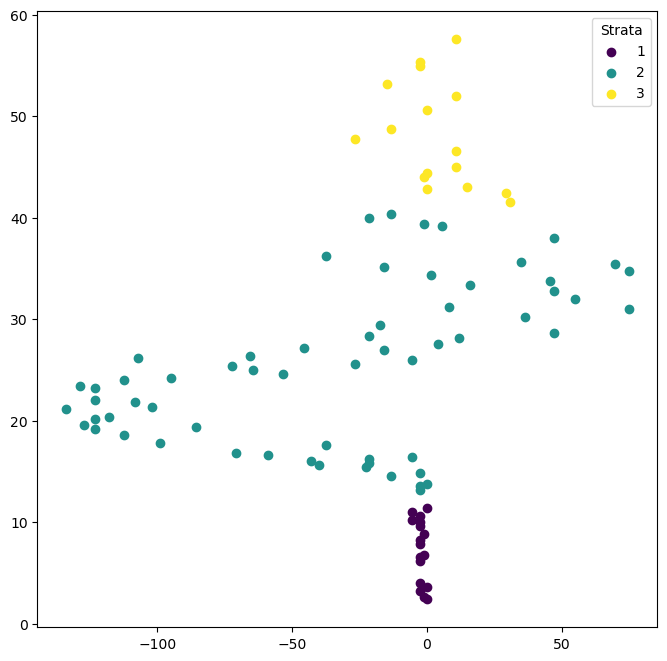

In [65]:
# Scatter plot
colors = plt.cm.viridis(np.linspace(0, 1, len(stratas))) 
color_map = dict(zip(stratas, colors))

plt.figure(figsize=(8,8))
for s in stratas:
    subset = motor_df[motor_df['strata'] == s]
    plt.scatter(subset['accel'], subset['times'], color=color_map[s], label=s)

plt.legend(title='Strata')
plt.show()


## **Question 2 (5 points):** Use your visualization to segment the dataset into at least 3 natural groups using any form of Pandas filtering functions. Save each group's data as its own DataFrame.

In [68]:
strata1 = motor_df[motor_df.strata == 1]
strata1.head()

,times,accel,strata
1,2.4,0.0,1
2,2.6,-1.3,1
3,3.2,-2.7,1
4,3.6,0.0,1
5,4.0,-2.7,1


In [69]:
strata2 = motor_df.query('strata == 2')
strata2.head()

,times,accel,strata
19,13.2,-2.7,2
20,13.6,-2.7,2
21,13.8,0.0,2
22,14.6,-13.3,2
28,14.8,-2.7,2


In [73]:
strata3 = motor_df.loc[motor_df['strata'] ==3]
strata3.head()

,times,accel,strata
114,41.6,30.8,3
116,42.4,29.4,3
117,42.8,0.0,3
119,43.0,14.7,3
120,44.0,-1.3,3


## **Question 3 (5 points):** Print a summary of each DataFrame including its size, shape, and descriptive statistics using the describe function. Write a few sentences in a text cell on if any relationships emerge and if the results are surprising or expected.

In [80]:
dfs = [strata1, strata2, strata3]
for df in dfs:
    print(df.size,'\n',
          df.shape, '\n', 
          df.describe(), '\n\n')

51 
 (17, 3) 
            times      accel  strata
count  17.000000  17.000000    17.0
mean    7.235294  -2.294118     1.0
std     3.113065   1.571810     0.0
min     2.400000  -5.400000     1.0
25%     4.000000  -2.700000     1.0
50%     7.800000  -2.700000     1.0
75%    10.000000  -1.300000     1.0
max    11.400000   0.000000     1.0 


183 
 (61, 3) 
            times       accel  strata
count  61.000000   61.000000    61.0
mean   25.268852  -33.850820     2.0
std     7.838442   59.011583     0.0
min    13.200000 -134.000000     2.0
25%    18.600000  -85.600000     2.0
50%    25.000000  -21.500000     2.0
75%    31.200000    1.300000     2.0
max    40.400000   75.000000     2.0 


48 
 (16, 3) 
            times      accel  strata
count  16.000000  16.000000    16.0
mean   48.137500   3.512500     3.0
std     5.230535  15.093348     0.0
min    41.600000 -26.800000     3.0
25%    43.750000  -2.700000     3.0
50%    47.200000   0.000000     3.0
75%    52.300000  10.700000     3.0
max

## Part 2: Getting Data From APIs and Web Scraping (30 points)
A great source of data and Pandas practice is getting data from the Internet. Rather than a .csv file, many data will be in a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

In the 2nd part of this lab, you will choose from utilizing a simple API for getting and analyzing data through a variety of queries or web scraping a page.

**Web Scraping Examples**
* Any Wikipedia page
  * https://en.wikipedia.org/wiki/Capybara  
  * https://en.m.wikipedia.org/wiki/List_of_common_misconceptions
* https://toscrape.com/
* https://www.scrapethissite.com/
* https://github.com/stanfordjournalism/search-script-scrape


**API Examples**
*   https://pokeapi.co/
  * Example: https://pokeapi.co/api/v2/pokemon?limit=1000&offset=0
* https://place.dog/
* https://dukengn.github.io/Dog-facts-API/  
* https://apiv3.iucnredlist.org/api/v3/docs

A more exhaustive API list can be found at: https://github.com/public-apis/public-apis.



## **Question 1 (5 points):** Pick a URL (several examples are above) to either web scrape data from OR query using an API (no need to do both). Download your initial raw data using the `requests` package and store it in a variable.

## Print your variable. Observe what kind of data your API or website can produce and design a DataFrame of at least 1 column you would like to create. Write the feature(s) you plan on obtaining below.



### **URL Chosen:** Text

### **API or Web Scraping:** Text

### **DataFrame Column(s):** Feature 1

In [90]:
r = requests.get('https://httpbin.org/user-agent')
useragent = json.loads(r.text)['user-agent']
headers = {'User-agent' : useragent}

In [107]:
# https://github.com/public-apis/public-apis?
root = 'https://wizard-world-api.herokuapp.com' # Oscar nominations
endpoint = '/Spells'
r = requests.get(url=root+endpoint, headers=headers)

In [108]:
r

<Response [200]>

In [110]:
data = r.json()
spells = pd.DataFrame(data)
spells

,id,name,incantation,effect,canBeVerbal,type,light,creator
0,fbd3cb46-c174-4843-a07e-fd83545dce58,Opening Charm,Aberto,Opens doors,True,Charm,Blue,None
1,5eb39a99-72cd-4d40-b4aa-b0f5dd195100,Water-Making Spell,Aguamenti,Conjures water,True,Conjuration,IcyBlue,None
2,ab3a8dfe-1e56-4706-a20d-26afee011ed7,Alarte Ascendare,Alarte Ascendare,Rockets target upward,True,Charm,Red,None
3,c6898622-b914-4609-b3a0-8659ed2ca08a,Animagus Spell,Amato Animo Animato Animagus,Used as part of the ritual to become an Animagus,True,Transfiguration,Gold,None
4,0a11bbf5-702c-45ab-bdd6-20debf00ed39,Anteoculatia,Anteoculatia,Grows antlers on head,True,DarkCharm,Red,None
...,...,...,...,...,...,...,...,...
301,b907b56f-d643-4e9a-a37f-caa18b61ab97,Levitation Charm,Wingardium Leviosa,Makes objects levitate,True,Charm,Transparent,Jarleth Hobart (1544)
302,c2a8a6f0-607e-43d3-911d-d57925a5c58c,White sparks,None,Jet of white sparks,None,Charm,White,None
303,fe45755f-6310-44fc-bdac-58e6485c2b35,Age Line,None,Prevents people above or below a certain age from access to a target,None,Charm,Blue,None
304,77cead53-30ae-48a9-a118-e3d3df5ffd57,Summoning Charm,Accio,Summons an object,True,Charm,Transparent,None


In [114]:
data = json.loads(r.text)
pd.DataFrame(data)

,id,name,incantation,effect,canBeVerbal,type,light,creator
0,fbd3cb46-c174-4843-a07e-fd83545dce58,Opening Charm,Aberto,Opens doors,True,Charm,Blue,None
1,5eb39a99-72cd-4d40-b4aa-b0f5dd195100,Water-Making Spell,Aguamenti,Conjures water,True,Conjuration,IcyBlue,None
2,ab3a8dfe-1e56-4706-a20d-26afee011ed7,Alarte Ascendare,Alarte Ascendare,Rockets target upward,True,Charm,Red,None
3,c6898622-b914-4609-b3a0-8659ed2ca08a,Animagus Spell,Amato Animo Animato Animagus,Used as part of the ritual to become an Animagus,True,Transfiguration,Gold,None
4,0a11bbf5-702c-45ab-bdd6-20debf00ed39,Anteoculatia,Anteoculatia,Grows antlers on head,True,DarkCharm,Red,None
...,...,...,...,...,...,...,...,...
301,b907b56f-d643-4e9a-a37f-caa18b61ab97,Levitation Charm,Wingardium Leviosa,Makes objects levitate,True,Charm,Transparent,Jarleth Hobart (1544)
302,c2a8a6f0-607e-43d3-911d-d57925a5c58c,White sparks,None,Jet of white sparks,None,Charm,White,None
303,fe45755f-6310-44fc-bdac-58e6485c2b35,Age Line,None,Prevents people above or below a certain age from access to a target,None,Charm,Blue,None
304,77cead53-30ae-48a9-a118-e3d3df5ffd57,Summoning Charm,Accio,Summons an object,True,Charm,Transparent,None


## **Question 2 (10 points):**
## Create the DataFrame of your selected feature(s). Whether using an API or scraping, you might need to implement loops to extract enough clean features to use. Be creative with using iteration and data structures to get your data! 

## **Question 3 (15 points):** Perform an exploratory analysis on the DataFrame you've created, making modifications to it as necessary. Some example features to explore include:
* If you've scraped text data, plot a few rows of data
* If you've scraped any image URLs, plot a few of them
* If you've scraped any image URLs, add a column for file extension type
* Run some value counts on different variables
* If your columns are messy or hard to read, rename them
* Cast data types into a usable state (ie: string to integer for numerical analysis)

## After exploring, write down 1 to 2 sentences about any interestings aspects of your data (group characteristics, clear relationships between variables) or your process of getting it.

My data....

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.